# Getting started with atmospheric mole fraction data and NAME footprints

We can use xarray to conveniently read netCDF files containing mole fraction data. The xarray documentation has lots of useful examples on its usage.

We'll also import matplotlib for visualisation and cartopy for mapping.

In [67]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
from cartopy import crs as ccrs
import pandas as pd

## Reading mole fraction data

Note that this data is usually in dry air mole fractions (mol/mol). The units in these files are typically a number:
- 1e-6 indicates parts per million (ppm)
- 1e-9 parts per billion (ppb)
- 1e-12 parts per trillion(ppt)

In [101]:
# You can open datasets using the open_dataset function
# However, that doesn't load the data into memory, and leaves the file open by default
# To make sure the file is closed, you can use the context manager (with statement)
with xr.open_dataset("../data/DECC-picarro_RGL_ch4-90m-part.nc") as f:
    ds_obs = f.load()


In [102]:
# Let's look at the contents of the file
ds_obs

<xarray.Dataset>
Dimensions:                     (time: 73)
Coordinates:
  * time                        (time) datetime64[ns] 2020-12-05 ... 2020-12-08
Data variables:
    ch4                         (time) float32 2.027e+03 2.029e+03 ... 2.081e+03
    ch4_variability             (time) float32 0.5807 1.545 ... 2.865 1.424
    ch4_number_of_observations  (time) float64 25.08 25.02 25.04 ... 25.04 25.0
Attributes: (12/15)
    data_owner:           Simon O'Doherty
    data_owner_email:     s.odoherty@bristol.ac.uk
    inlet_height_magl:    90.0
    comment:              Cavity ring-down measurements. Output from GCWerks
    Conditions of use:    Ensure that you contact the data owner at the outse...
    Source:               In situ measurements of air
    ...                   ...
    species:              ch4
    Calibration_scale:    WMO-X2004A
    station_longitude:    -2.5399
    station_latitude:     51.997435
    station_long_name:    Ridge Hill, UK
    station_height_masl:  200.0

Here, we can see that the file has one coordinate (time), and four data variables. The mole fraction data is in the variable ```sf6```.

Global attributes tell us about the file contents, and each variable also has a set of attributes describing the variable.

You can output the global attributes using:

In [103]:
ds_obs.attrs

{'data_owner': "Simon O'Doherty",
 'data_owner_email': 's.odoherty@bristol.ac.uk',
 'inlet_height_magl': 90.0,
 'comment': 'Cavity ring-down measurements. Output from GCWerks',
 'Conditions of use': 'Ensure that you contact the data owner at the outset of your project.',
 'Source': 'In situ measurements of air',
 'Conventions': 'CF-1.6',
 'File created': '2023-10-10 19:48:09.992258+00:00',
 'Processed by': 'zh21490@bristol.ac.uk',
 'species': 'ch4',
 'Calibration_scale': 'WMO-X2004A',
 'station_longitude': -2.5399,
 'station_latitude': 51.997435,
 'station_long_name': 'Ridge Hill, UK',
 'station_height_masl': 200.0}

Or some variable attributes:

In [105]:
ds_obs.ch4.attrs

{'long_name': 'mole_fraction_of_methane_in_air', 'units': '1e-9'}

Xarray has a built-in plot method (using Matplotlib). We can plot a variable like this:

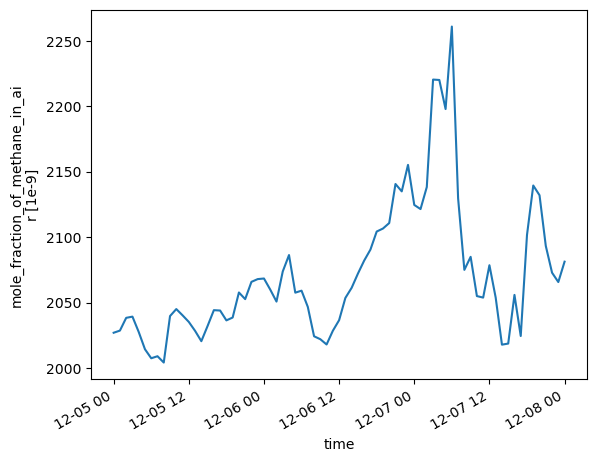

In [106]:
ds_obs.ch4.plot()

## Reading footprints

A "footprint" tells us the sensitivity of a particular observation to emissions from the surrounding region. Our footprints are processed into units of (mole fraction) / (emissions). E.g., (mol/mol)/(mol/m2/s). 

Here, we'll read some footprints for the Ridge Hill site (RGL). 

In [11]:
with xr.open_dataset("../data/fp_RGL-90magl_UKV_EUROPE_part.nc") as f:
    ds_fp = f.load()

These files contain more dimensions and variables than the obs data. 

In addition to "time" (which is the observation time) is a longitude and latitude coordinate, since the footprints are stored as 2D lon/lat fields.

The variable "fp" contains the footprint. You'll also see meteorological variables such as wind speed and wind direction, and Planetary Boundary Layer Height (PBLH):

In [12]:
ds_fp

<xarray.Dataset>
Dimensions:               (time: 72, lon: 391, lat: 293, lev: 1, height: 20)
Coordinates:
  * time                  (time) datetime64[ns] 2020-12-05 ... 2020-12-07T23:...
  * lon                   (lon) float32 -97.9 -97.55 -97.2 ... 38.68 39.03 39.38
  * lat                   (lat) float32 10.73 10.96 11.2 ... 78.59 78.82 79.06
  * lev                   (lev) |S1 b'F'
  * height                (height) float32 500.0 1.5e+03 ... 1.85e+04 1.95e+04
Data variables: (12/16)
    fp                    (lat, lon, time) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    temperature           (time) float32 1.752 2.0 2.136 ... 2.593 2.414 2.336
    pressure              (time) float32 954.0 954.2 954.8 ... 973.5 973.6 973.4
    wind_speed            (time) float32 5.99 5.11 4.39 ... 2.872 3.146 3.99
    wind_direction        (time) float32 193.9 207.6 163.7 ... 266.3 260.8 267.6
    PBLH                  (time) float32 274.0 349.5 232.5 ... 13.12 13.12 13.12
    ...                    ...
    particle_locations_s  (height, lon, time) float32 0.0 0.0 0.0 ... 0.0 0.0
    particle_locations_w  (height, lat, time) float32 0.0 0.0 0.0 ... 0.0 0.0
    mean_age_particles_n  (height, lon, time) float32 285.5 216.4 ... 0.0 0.0
    mean_age_particles_e  (height, lat, time) float32 0.0 0.0 0.0 ... 0.0 0.0
    mean_age_particles_s  (height, lon, time) float32 0.0 0.0 0.0 ... 0.0 0.0
    mean_age_particles_w  (height, lat, time) float32 0.0 0.0 0.0 ... 0.0 0.0
Attributes: (12/13)
    fp_output_units:          ppms
    fp_output:                Mixing Ratio
    species:                  Inert
    model:                    NAME
    met_model:                UKV
    output_folder:            MixR_files
    ...                       ...
    domain:                   EUROPE
    site:                     RGL
    inlet_height:             90magl
    ACRG_repository_version:  v0.2.0-22-gca6dc68
    author:                   ag12733
    created:                  2021-04-28 14:52:44.200292

We can plot the footprint for a given time using the xarray plot method. However, note that footprints decay somewhat exponentially with distance from the measurement point, so the plots look rather sparse:

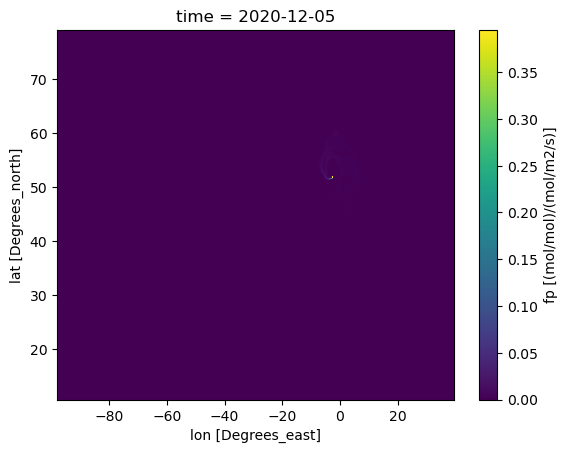

In [14]:
ds_fp.fp.sel(time="2020-12-05 00:00").plot()

We can see more of the long-range shape of the footprint by plotting the log. I've done this here using using numpy and matplotlib for increased flexibility in the plotting:

/Users/chxmr/opt/miniconda3/envs/openghg_env/lib/python3.10/site-packages/xarray/core/computation.py:769: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


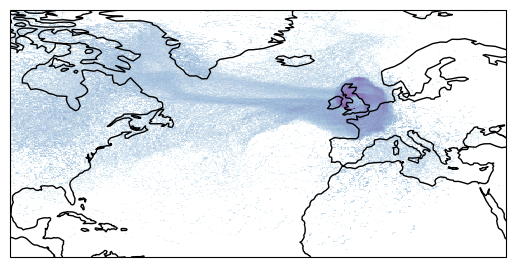

In [46]:
# Plot log of footprint on a map
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.pcolormesh(ds_fp.lon, ds_fp.lat, np.log10(ds_fp.fp.sel(time="2020-12-05 00:00")),
    transform=ccrs.PlateCarree(),
    cmap="BuPu")

# Show colourbar (broken for some reason, need to debug...)
#plt.colorbar(orientation = "horizontal", pad=0.05, aspect=50)

/Users/chxmr/opt/miniconda3/envs/openghg_env/lib/python3.10/site-packages/xarray/core/computation.py:769: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


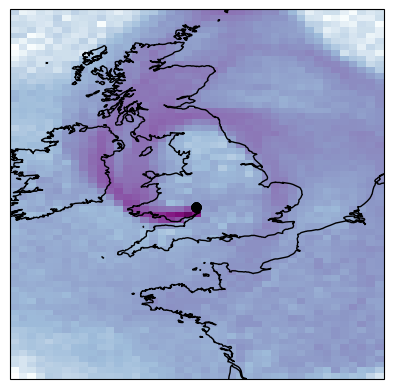

In [50]:
# Zoom into the UK
ds_fp_uk = ds_fp.sel(lon=slice(-10, 5), lat=slice(45, 60))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.pcolormesh(ds_fp_uk.lon, ds_fp_uk.lat,
    np.log10(ds_fp_uk.fp.sel(time="2020-12-05 00:00")),
    transform=ccrs.PlateCarree(),
    cmap="BuPu")

# Add release location point
ax.plot(ds_fp_uk.release_lon, ds_fp_uk.release_lat, 'o', color="black", transform=ccrs.PlateCarree())

## Using the model to predict concentrations

The footprints describe the atmospheric dispersion of a gas, given some set of emissions from the region surrounding the measurement point. Therefore, to predict the concentration, we need some estimate of emissions. 

Here, we use an estimate of CH4 emissions from the EDGAR database:

In [78]:
with xr.open_dataset("../data/ch4-EUROPE_2016_EDGARv6.nc") as f:
    ds_flux_ch4 = f.load()

In [79]:
ds_flux_ch4

<xarray.Dataset>
Dimensions:  (lat: 293, lon: 391)
Coordinates:
  * lat      (lat) float64 10.73 10.96 11.2 11.43 ... 78.36 78.59 78.82 79.06
  * lon      (lon) float64 -97.9 -97.55 -97.2 -96.84 ... 38.32 38.68 39.03 39.38
Data variables:
    flux     (lat, lon) float64 1.937e-13 1.179e-12 ... 1.948e-15 1.279e-11
Attributes:
    title:           EUROPE CH4 EDGARv6 2016
    summary:         EDGARv6 yearly CH4 totals for 2016 regridded to EUROPE N...
    author:          ef17148
    regridder_used:  acrg.grid.regrid.regrid2d
    source_file:     /group/chemistry/acrg/Gridded_fluxes/CH4/EDGAR_v6.0/year...

Plot the flux (note that the colorbar label is slightly wrong here, as it doesn't know that we've taken the log):

/Users/chxmr/opt/miniconda3/envs/openghg_env/lib/python3.10/site-packages/xarray/core/computation.py:769: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


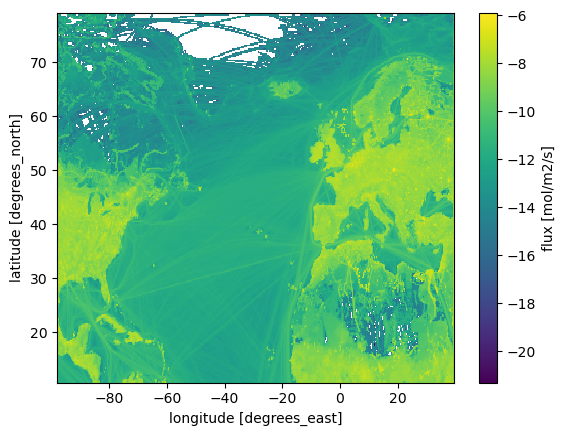

In [70]:
np.log10(ds_flux_ch4.flux).plot()

To calculate mole fraction ($\chi$) at a point in time $t$, we need to combine the emissions and footprint using:
$$\chi_t = \sum_{j}q_jf_{t,j}
$$

where $j$ is a grid cell within the domain, $q$ are the emissions and $f_t$ is the footprint at time $t$.

First, note that this flux dataset doesn't have a time coordinate, so we need to add one:

In [82]:
# Create a time range. Here, we'll just assume fluxes are constant for 10 years
nt = 10
time = pd.date_range(start='1/1/2016', periods=nt, freq='Y')

# Repeat the flux variable nt times
flux = np.repeat(ds_flux_ch4.flux.values[np.newaxis, :, :], nt, axis=0)

# Add flux and time dimension to ds_flux_ch4
ds_flux_ch4 = ds_flux_ch4.assign({"time": time, "flux": (("time", "lat", "lon"), flux)})

Now we need to reindex the flux to the same time resolution as the footprints, multiply the flux and footprint together, and then sum over lat and lon. 

**Note that reindexing the flux will expand the size of the array very substantially, as it will copy the 2D flux array to every timestep. You'll run out of memory if you do this for a large set of footprints. In that case, use a ```for``` loop**.

In [93]:
ch4_model = (ds_flux_ch4.flux.reindex_like(ds_fp.time, method="nearest") * ds_fp.fp).sum(dim=["lat", "lon"])

Text(0, 0.5, 'CH$_4$ (nmol/mol)')

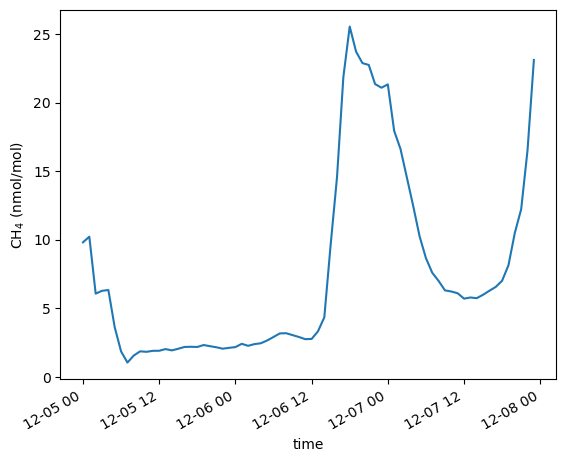

In [99]:
(ch4_model*1e9).plot()
plt.ylabel("CH$_4$ (nmol/mol)")

Here, we can see that the concentrations are low compared to the real observations. This is because we have not accounted for the mole fraction of the air "entering" our domain. We call this the "baseline" concentration. There are many ways to estimate this baseline. Here, we'll just add a constant:

Text(0, 0.5, 'CH$_4$ (nmol/mol)')

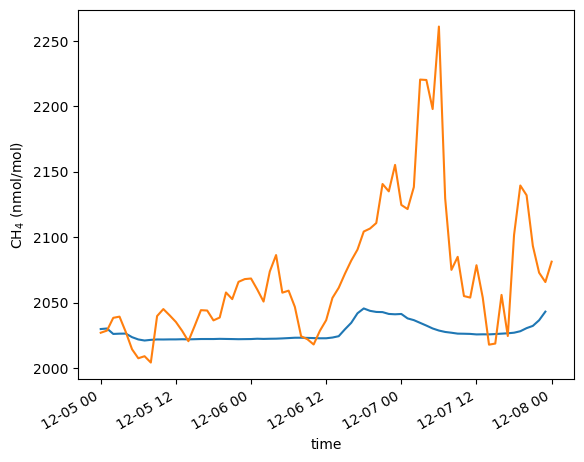

In [110]:
(ch4_model*1e9 + 2020).plot()
ds_obs.ch4.plot()
plt.ylabel("CH$_4$ (nmol/mol)")

In [111]:
# No idea why this is 10x too small...